-------
# <center>CLASSICAL MACHINE LEARNING<center>

## <center>Handwritten Digit Classification<center>

-----------

# 1. Load Modules

In [ ]:
#Installling this library to help create clear results tables
! pip install tabulate

In [ ]:
# Libraries used throughout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize


from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    confusion_matrix, roc_curve, auc, classification_report
)

# Classifications Models imported
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# 2. Load Data

In [ ]:
# Loading the dataset (handwritten digits)
digits = datasets.load_digits(as_frame=True)
X = digits['data']
y = digits['target']

### 2.1.1 IMBALANCED DATASET CHECK

Target label counts:
 target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


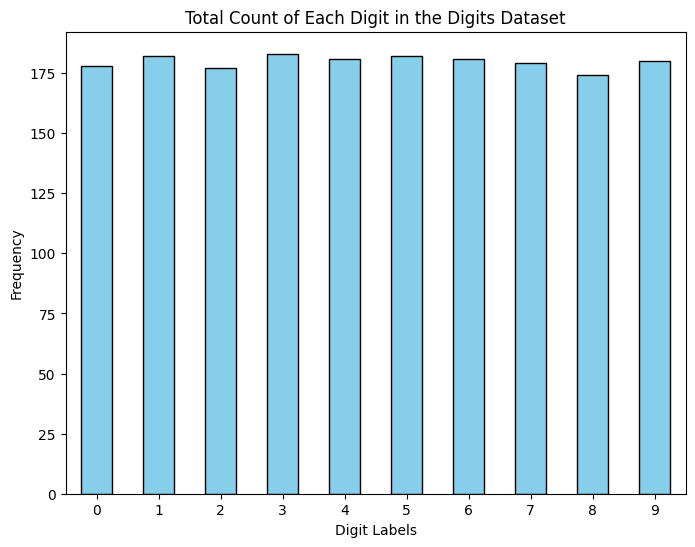

In [ ]:
# Counting the target labels for each digit (0 to 9)
target_counts = y.value_counts().sort_index()
print("Target label counts:\n", target_counts)

# A bar chat to show the label counts per target
plt.figure(figsize=(8,6))
target_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Digit Labels")
plt.ylabel("Frequency")
plt.title("Total Count of Each Digit in the Digits Dataset")
plt.xticks(rotation=0)
plt.show()

In [ ]:
imbalance_ratio = target_counts.min() / target_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

**Observation**
- The class distribution shows a minimal imbalance with an imbalance ratio of 0.95, indicating that the classes are nearly equally represented as the ratio is close to 1 .
- The bar graph shows that the dataset is balanced, with a relatively equal number of digits in each class. As a result, there is no need to use the stratify parameter when splitting the data (see appendix 1).





### 2.1.2 DATA SPLIT

In [ ]:
# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

# 3. CLASSIFICATION

### Classification Methods Used

1. Logistic Regression [[4]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. Gaussian Naive Bayes [[3]](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
3. Random Forest Classifier [[6]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. K-Nearest Neighbors [[7]](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
5. Decision Tree Classifier [[5]](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
6. Support Vector Classifier [[8]]( https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
7. Gradient Boosting [[9]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
8. Linear Discriminant Analysis [[17]](https://www.ibm.com/think/topics/linear-discriminant-analysis)







# 4. TRAINING THE MODELS

In [ ]:
# Training the Gaussian Naive Bayes model with default parameters
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Training the Gaussian Naive Bayes model with hyperparameter Tuning
nb_param_grid = {"var_smoothing": np.logspace(-9, 0, 10)}
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring="accuracy")
nb_grid_search.fit(X_train_scaled, y_train)

#___________________________________________________________________________________________________________

# Training the Logistic Regression model with default parameters
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_scaled, y_train)

# Training the Logistic Regression model with hyperparameter Tuning
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Performing a Grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=10000), lr_param_grid,  verbose = 2 ,cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_scaled, y_train)

#___________________________________________________________________________________________________________

# Training the Random Forest Classifier model with default parameters **
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train_scaled, y_train)


# Training the Random Forest Classifier model with hyperparameter tuning
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Performing a Grid search for Random Forest classifier model**
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring="accuracy")
rf_grid_search.fit(X_train_scaled, y_train)

#___________________________________________________________________________________________________________

# Training the K- Nearest Neighbour model with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Training the K- Nearest Neighbour model with hyperparameter Tuning
knn_param_grid = {
   'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2]
}

# Performing a Grid search for K- Nearest Neighbour model
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)


#___________________________________________________________________________________________________________

# Training the Decision Tree Classifier model with default parameters**
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train_scaled, y_train)


# Training the Decision Tree Classifier model with hyperparameter tuning
dt_param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [3, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
}

# Performing a Grid search for Decision Tree classifier***
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=10,  verbose = 2 ,scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)


#___________________________________________________________________________________________________________

# Training the Support Vector Classifer model with default parameters**
svm_model = SVC(kernel='rbf', probability=True, random_state=123)
svm_model.fit(X_train_scaled, y_train)

#  Training the Support Vector Classifer model with hyperparameter tuning
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Performing a Grid search for Support Vector Classifer **
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)


#___________________________________________________________________________________________________________

# Training the Gradient Boosting Classifer model with default parameters
gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(X_train_scaled, y_train)
default_gbc = gbc.score(X_train_scaled, y_train)

# Training the Gradient Boosting Classifer model with hyperparameter tuning
gbc_param_grid = {
    'n_estimators': [120, 130, 8000, 10000, 20000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.5, 0.6, 0.9],
    'validation_fraction': [0.1],
    'n_iter_no_change': [10]
}

# Performing a Grid search for Gradient Boosting Classifer**
gbc_grid_search = GridSearchCV(gbc, gbc_param_grid, cv=5, n_jobs=-1)
gbc_grid_search.fit(X_train_scaled, y_train)

#___________________________________________________________________________________________________________


#  Training the Linear Discriminant Analysis model with default parameters
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

#  Training the Linear Discriminant Analysis model with hyperparameters tuning
lda_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', 0.01, 0.05, 0.1, 0.5],
    'n_components': [None, 5, 10, 15]
}


# Performing a Grid search for  Linear Discriminant Analysis
lda_grid_search = GridSearchCV(lda, lda_param_grid, cv=5, n_jobs=-1)
lda_grid_search.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ........................................

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedEr

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [None, 5, 10, 15],
                         'shrinkage': ['auto', 0.01, 0.05, 0.1, 0.5],
                         'solver': ['svd', 'lsqr', 'eigen']})

**Results**
- Using 80% of the data, all models were successfully trained with both default and tuned hyperparameters.

- The Random Forest, Decision Tree, SVM, and Gradient Boosting models have their random_state set to 123 to ensure reproducibility and enable consistent comparison of model performance.



# 5. EVALUATION

- **5.1 Evaluating Overfitting : Cross-Validation Scores and Comparison Visualisations**

In [ ]:
# Calcuting the cross validation scores : default and tuned
nb_default_cv = cross_val_score(nb_model, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()
nb_tuned_cv   = cross_val_score(nb_grid_search.best_estimator_, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()

lr_default_cv = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, n_jobs=-1).mean()
lr_tuned_cv   = cross_val_score(lr_grid_search.best_estimator_, X_train_scaled, y_train, cv=5, n_jobs=-1).mean()

rf_default_cv = cross_val_score(rf_model, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()
rf_tuned_cv   = cross_val_score(rf_grid_search.best_estimator_, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()

knn_default_cv = cross_val_score(knn, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()
knn_tuned_cv   = cross_val_score(knn_grid_search.best_estimator_, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()

dt_default_cv = cross_val_score(dt, X_train_scaled, y_train, cv=5, n_jobs=-1).mean()
dt_tuned_cv   = cross_val_score(dt_grid_search.best_estimator_, X_train_scaled, y_train, cv=5, n_jobs=-1).mean()

svm_default_cv = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, n_jobs=-1).mean()
svm_tuned_cv   = cross_val_score(svm_grid_search.best_estimator_, X_train_scaled, y_train, cv=5, n_jobs=-1).mean()

gbc_default_cv = cross_val_score(gbc, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()
gbc_tuned_cv   = gbc_grid_search.best_score_

lda_default_cv = cross_val_score(lda, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()
lda_tuned_cv   = lda_grid_search.best_score_


<Figure size 1280x960 with 0 Axes>

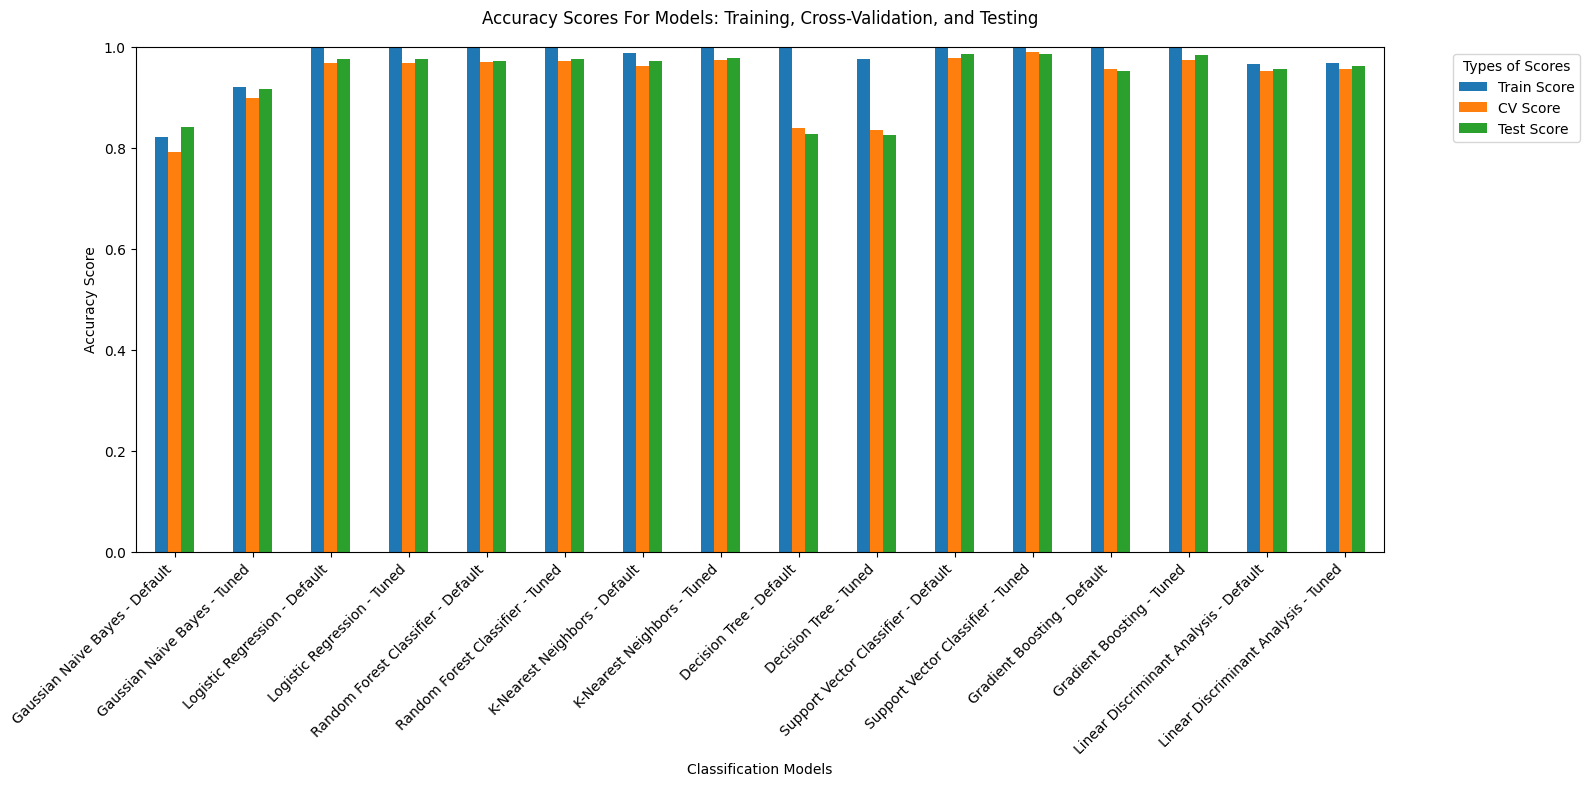

In [ ]:
# Combining all the scores by their models
combined_results = {
    'Gaussian Naive Bayes': {
        'Default': [nb_model.score(X_train_scaled, y_train), nb_default_cv, nb_model.score(X_test_scaled, y_test)],
        'Tuned':   [nb_grid_search.best_estimator_.score(X_train_scaled, y_train), nb_tuned_cv, nb_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'Logistic Regression': {
        'Default': [lr_grid_search.best_estimator_.score(X_train_scaled, y_train), lr_default_cv, lr_grid_search.best_estimator_.score(X_test_scaled, y_test)],
        'Tuned':   [lr_grid_search.best_estimator_.score(X_train_scaled, y_train), lr_tuned_cv, lr_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'Random Forest Classifier': {
        'Default': [rf_model.score(X_train_scaled, y_train), rf_default_cv, rf_model.score(X_test_scaled, y_test)],
        'Tuned':   [rf_grid_search.best_estimator_.score(X_train_scaled, y_train), rf_tuned_cv, rf_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'K-Nearest Neighbors': {
        'Default': [knn.score(X_train_scaled, y_train), knn_default_cv, knn.score(X_test_scaled, y_test)],
        'Tuned':   [knn_grid_search.best_estimator_.score(X_train_scaled, y_train), knn_tuned_cv, knn_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'Decision Tree': {
        'Default': [dt.score(X_train_scaled, y_train), dt_default_cv, dt.score(X_test_scaled, y_test)],
        'Tuned':   [dt_grid_search.best_estimator_.score(X_train_scaled, y_train), dt_tuned_cv, dt_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'Support Vector Classifier': {
        'Default': [svm_model.score(X_train_scaled, y_train), svm_default_cv, svm_model.score(X_test_scaled, y_test)],
        'Tuned':   [svm_grid_search.best_estimator_.score(X_train_scaled, y_train), svm_tuned_cv, svm_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'Gradient Boosting': {
        'Default': [gbc.score(X_train_scaled, y_train), gbc_default_cv, gbc.score(X_test_scaled, y_test)],
        'Tuned':   [gbc_grid_search.best_estimator_.score(X_train_scaled, y_train), gbc_tuned_cv, gbc_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    },
    'Linear Discriminant Analysis': {
        'Default': [lda.score(X_train_scaled, y_train), lda_default_cv, lda.score(X_test_scaled, y_test)],
        'Tuned':   [lda_grid_search.best_estimator_.score(X_train_scaled, y_train), lda_tuned_cv, lda_grid_search.best_estimator_.score(X_test_scaled, y_test)]
    }
}

#  Creating a dataframe contaning the train, cv and test score per trained model
index_labels = ['Train', 'CV', 'Test']
df_scores = pd.DataFrame()

# Creating a loop to add the evaluation scores to the dataframe aswell
for model_name, versions in combined_results.items():
    for version, scores in versions.items():
        col_label = f"{model_name} - {version}"
        df_scores[col_label] = scores

# A bar char comparing all the scores per classification model

plt.figure(dpi=200)

df_scores_T = df_scores.transpose()
ax = df_scores_T.plot(kind='bar', figsize=(16, 8))
plt.ylim([0, 1])
plt.ylabel("Accuracy Score")
plt.xlabel("Classification Models")
plt.title("Accuracy Scores For Models: Training, Cross-Validation, and Testing", y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Types of Scores", labels=["Train Score", "CV Score", "Test Score"], bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


**Observation**

- The bar chart compares the train, cross-validation, and test accuracy of each model in both default and tuned models to help in identifying the best-performing model. [[19] ](https://scikit-learn.org/stable/modules/grid_search.html)


 **5.2 Evaluating All Trained Models to Select the Top 8 Performers (Default vs. Tuned) Using Parity Plots**

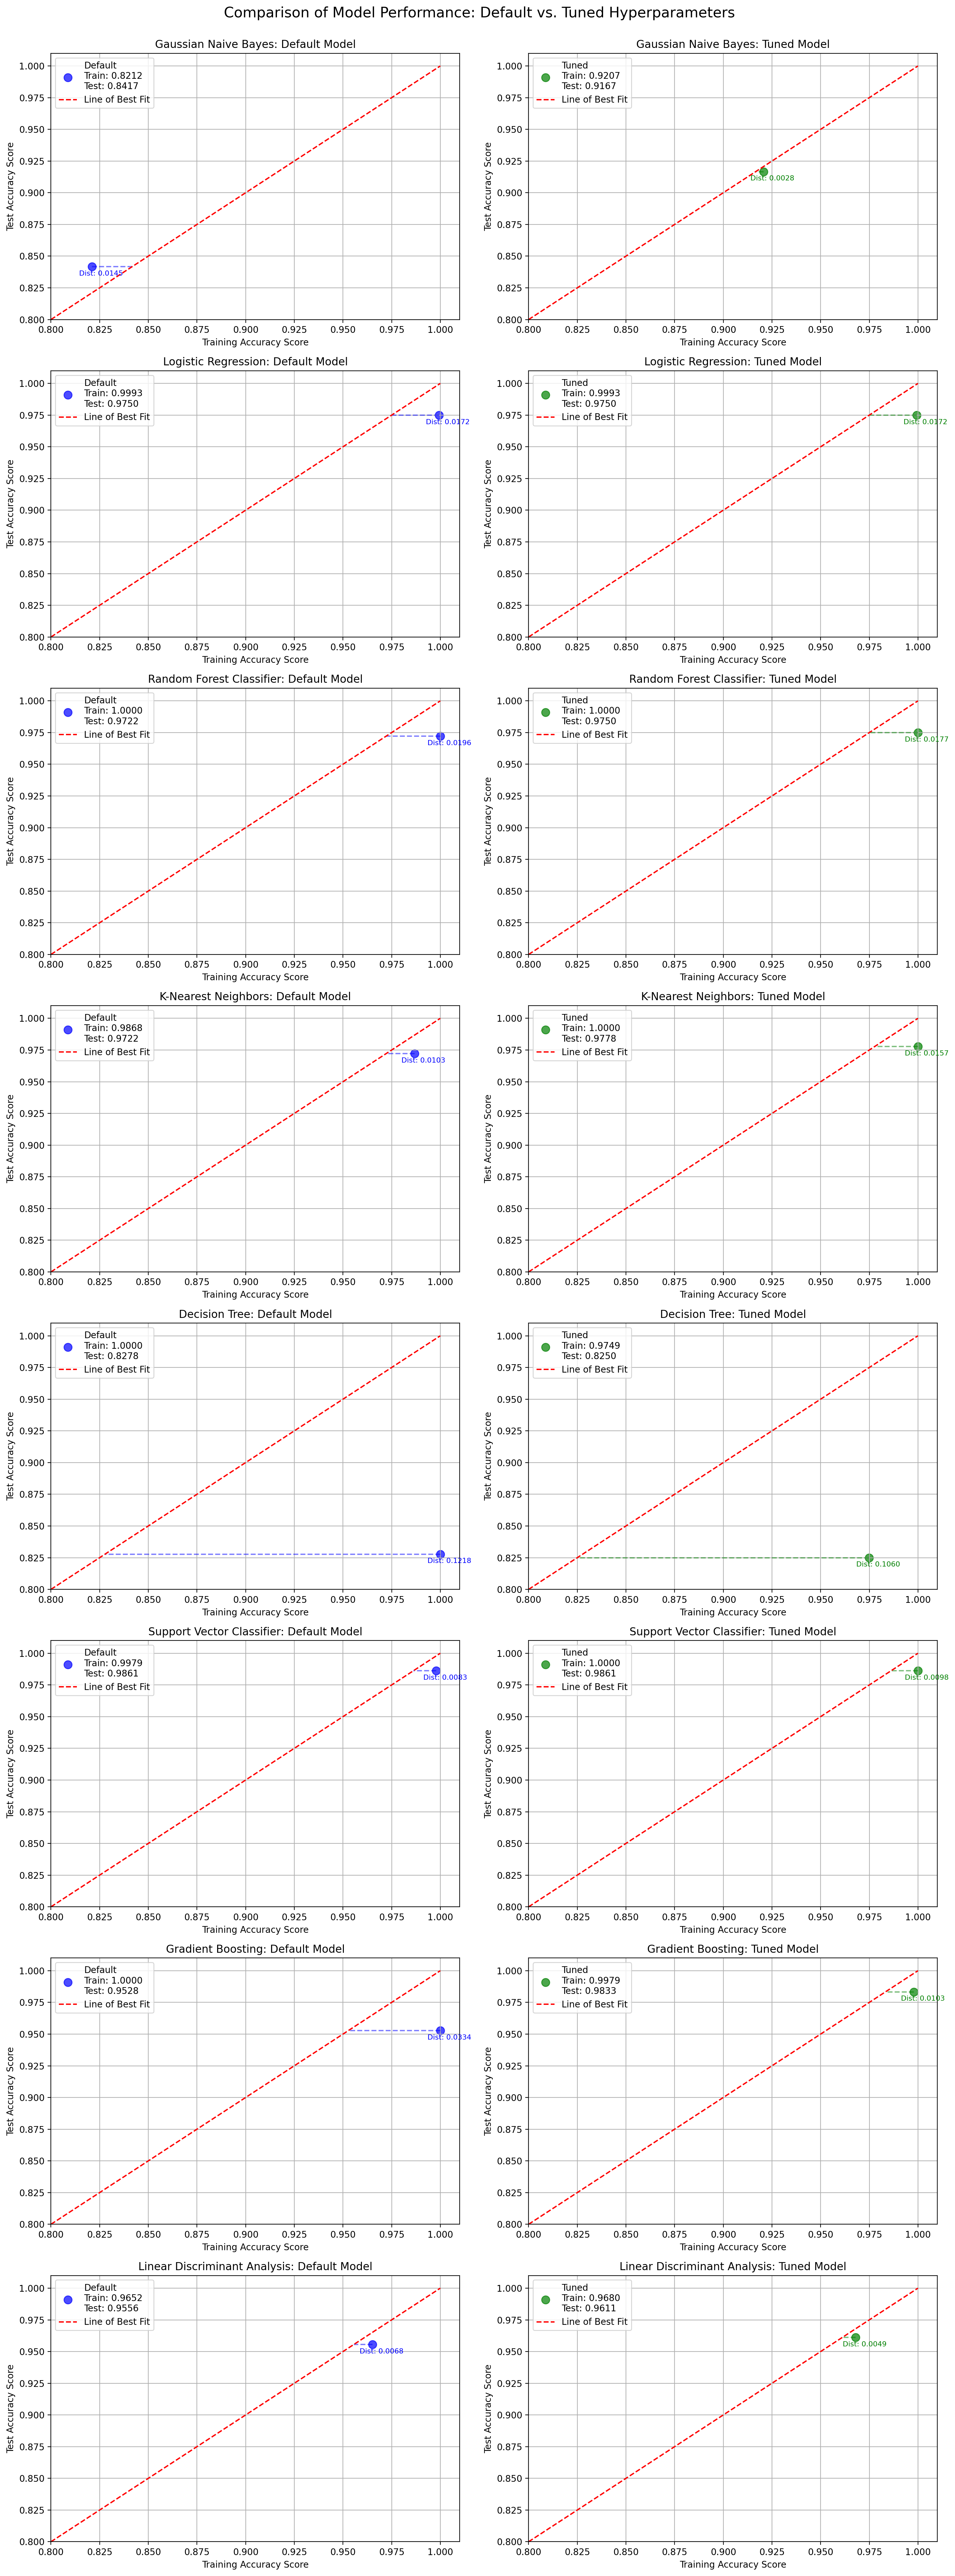

In [ ]:
# Listing all the classification models to use
models = [
    "Gaussian Naive Bayes",
    "Logistic Regression",
    "Random Forest Classifier",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Support Vector Classifier",
    "Gradient Boosting",
    "Linear Discriminant Analysis"
]

# Extracting all the train & test scores from combined_results above
train_default = []
test_default  = []
train_tuned   = []
test_tuned    = []

for model_name in models:
    train_default.append(combined_results[model_name]['Default'][0])
    test_default.append(combined_results[model_name]['Default'][2])

    train_tuned.append(combined_results[model_name]['Tuned'][0])
    test_tuned.append(combined_results[model_name]['Tuned'][2])

# Calculating the distance of each point from the line of best fit
def distance_from_best_fit_line(train_score, test_score):
    return abs(train_score - test_score) / np.sqrt(2)

# Creating subplots for each model: Default vs Tuned
fig, axes = plt.subplots(8, 2, figsize=(15, 40), dpi=200)

for i in range(len(models)):
    # The subplots for the default models
    axes[i][0].scatter(train_default[i], test_default[i], color='blue',
                       label=f'Default\nTrain: {train_default[i]:.4f}\nTest: {test_default[i]:.4f}', alpha=0.7, s=80)
    distance_default = distance_from_best_fit_line(train_default[i], test_default[i])

    # Adding a dotted line from best fit line to the plotted point to show the distance in the default models subplot
    axes[i][0].plot([train_default[i], test_default[i]], [test_default[i], test_default[i]], 'b--', alpha=0.5)
    axes[i][0].annotate(f"Dist: {distance_default:.4f}",
                        (train_default[i], test_default[i]), textcoords="offset points",
                        xytext=(10, -10), ha='center', fontsize=8, color='blue')

    # Drawing the line of best fit
    x_vals = np.linspace(0.8, 1.0, 100)
    axes[i][0].plot(x_vals, x_vals, 'r--', label='Line of Best Fit')

    axes[i][0].set_title(f"{models[i]}: Default Model")
    axes[i][0].set_xlabel("Training Accuracy Score")
    axes[i][0].set_ylabel("Test Accuracy Score")
    axes[i][0].set_xlim([0.8, 1.01])
    axes[i][0].set_ylim([0.8, 1.01])
    axes[i][0].legend(loc='upper left')
    axes[i][0].grid(True)

    # The subplots for the optimised models
    axes[i][1].scatter(train_tuned[i], test_tuned[i], color='green',
                       label=f'Tuned\nTrain: {train_tuned[i]:.4f}\nTest: {test_tuned[i]:.4f}', alpha=0.7, s=80)
    distance_tuned = distance_from_best_fit_line(train_tuned[i], test_tuned[i])

    # Adding a dotted line from best fit line to the plotted point to show the distance in the optimised models subplot
    axes[i][1].plot([train_tuned[i], test_tuned[i]], [test_tuned[i], test_tuned[i]], 'g--', alpha=0.5)
    axes[i][1].annotate(f"Dist: {distance_tuned:.4f}",
                        (train_tuned[i], test_tuned[i]), textcoords="offset points",
                        xytext=(10, -10), ha='center', fontsize=8, color='green')

    # Drawing the line of best fit
    axes[i][1].plot(x_vals, x_vals, 'r--', label='Line of Best Fit')

    axes[i][1].set_title(f"{models[i]}: Tuned Model")
    axes[i][1].set_xlabel("Training Accuracy Score")
    axes[i][1].set_ylabel("Test Accuracy Score")
    axes[i][1].set_xlim([0.8, 1.01])
    axes[i][1].set_ylim([0.8, 1.01])
    axes[i][1].legend(loc='upper left')
    axes[i][1].grid(True)


# Setting out correct titles and layouts for the display
plt.suptitle("Comparison of Model Performance: Default vs. Tuned Hyperparameters", fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

**Results**
- Each subplot presents the comparison of the different model performance between default and tuned hyperparameters for each model. The point closest to the reference line (line of best fit) indicates the model with the better performance between the two trained versions (default and optimised)

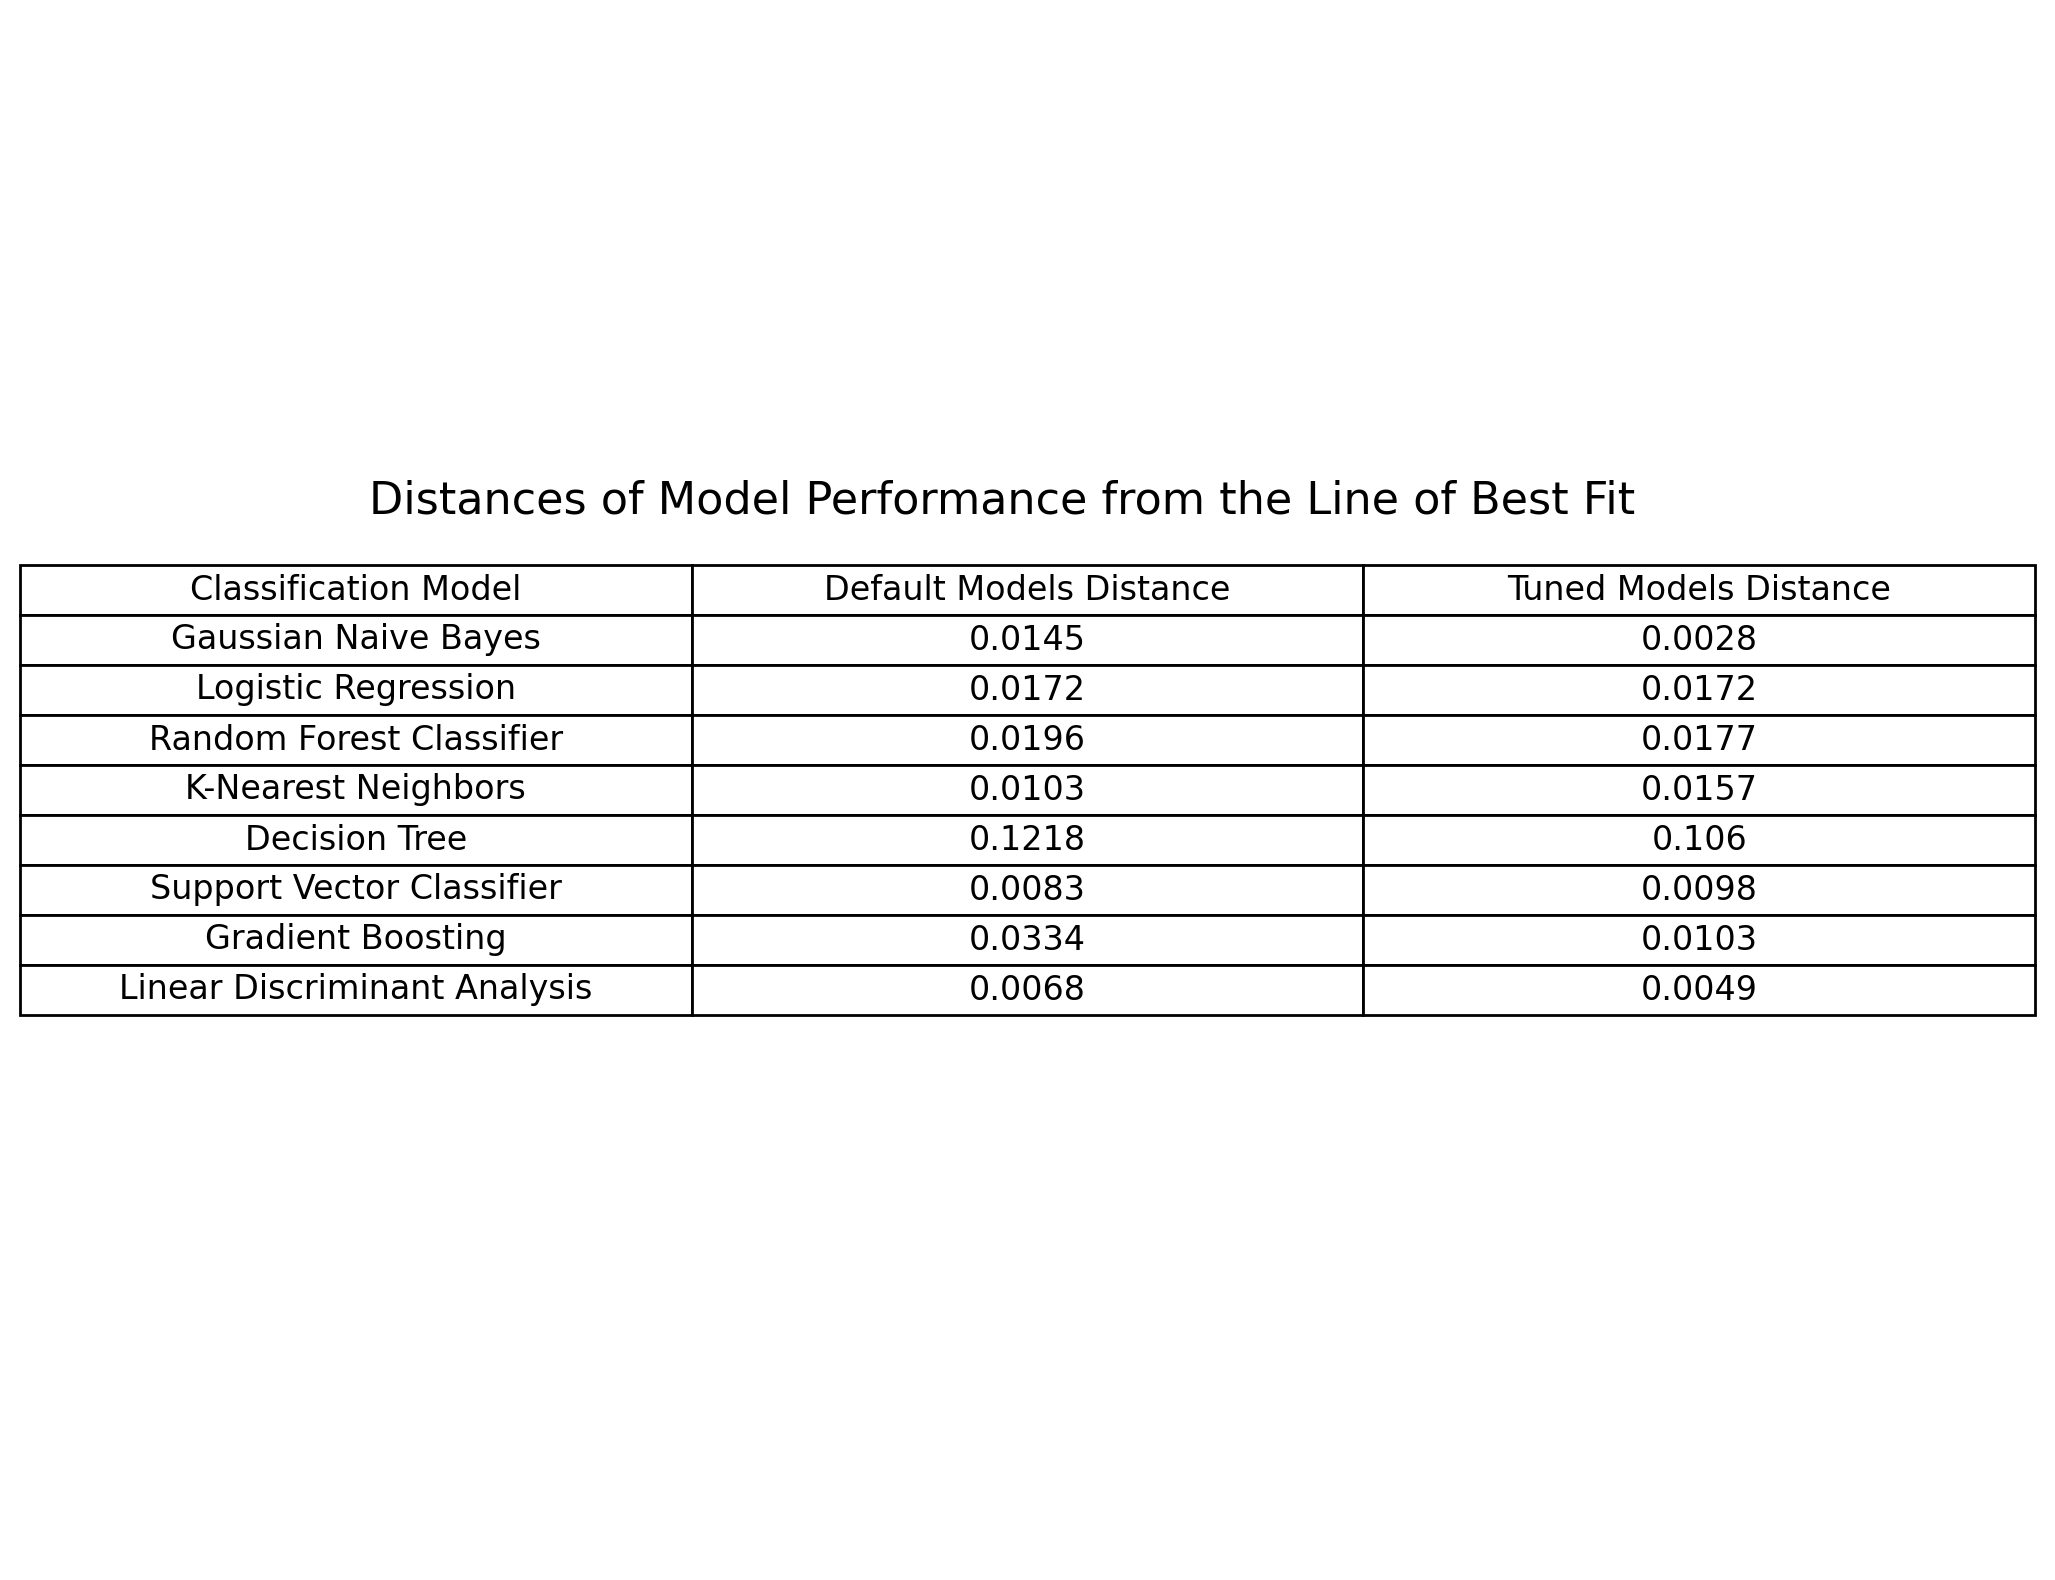

Selected Models Based On Distances from Best Fit Line
Model: Gaussian Naive Bayes, Best Version: Tuned, Distance from Best Fit Line: 0.0028
Model: Logistic Regression, Best Version: Default, Distance from Best Fit Line: 0.0172
Model: Random Forest Classifier, Best Version: Tuned, Distance from Best Fit Line: 0.0177
Model: K-Nearest Neighbors, Best Version: Default, Distance from Best Fit Line: 0.0103
Model: Decision Tree, Best Version: Tuned, Distance from Best Fit Line: 0.1060
Model: Support Vector Classifier, Best Version: Default, Distance from Best Fit Line: 0.0083
Model: Gradient Boosting, Best Version: Tuned, Distance from Best Fit Line: 0.0103
Model: Linear Discriminant Analysis, Best Version: Tuned, Distance from Best Fit Line: 0.0049


In [ ]:
# Function to calculate the distance from the line of best fit
def distance_from_best_fit_line(train_score, test_score):
    return abs(train_score - test_score) / np.sqrt(2)

# Create a dictionary that stores distances from the line of best fit for default and optimized models
model_distances = {
    'Classification Model': models,
    'Default Models Distance': [round(distance_from_best_fit_line(train_default[i], test_default[i]), 4)
                                for i in range(len(models))],
    'Tuned Models Distance': [round(distance_from_best_fit_line(train_tuned[i], test_tuned[i]), 4)
                              for i in range(len(models))]
}

# Create a dataframe to display the default and optimized distances results in a table
df_table = pd.DataFrame(model_distances)

# Display the distances in a table
fig, ax_table = plt.subplots(figsize=(10, 10), dpi = 200)
ax_table.axis('off')
table = plt.table(cellText=df_table.values,
                  colLabels=df_table.columns,
                  loc='center',
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.5)

# Set out a title and layout for the display
plt.suptitle("Distances of Model Performance from the Line of Best Fit", fontsize=16, y=0.65)
plt.show()

# Determine the best models based on the shortest distance from the line of best fit
best_models = []
for i in range(len(models)):
    distance_default = distance_from_best_fit_line(train_default[i], test_default[i])
    distance_tuned = distance_from_best_fit_line(train_tuned[i], test_tuned[i])

    # Select the model with the shortest distance from the line of best fit
    if distance_tuned < distance_default:
        best_models.append((models[i], 'Tuned', distance_tuned))
    else:
        best_models.append((models[i], 'Default', distance_default))

# Print the best models for each classification method
print("Selected Models Based On Distances from Best Fit Line")
for model in best_models:
    print(f"Model: {model[0]}, Best Version: {model[1]}, Distance from Best Fit Line: {model[2]:.4f}")

**Observation**

- The table displays the distance of each point from the various models along the line of best fit, formatted for clearer presentation of the results.
- The selected models Logistic Regression, K-Nearest Neighbors, and Support Vector Classifier perform better with their **default** paramaters.
- The selected models Gaussian Naive Bayes, Random Forest Classifier, Decision Tree, Gradient Boosting, and Linear Discriminant Analysis perform better with their **tuned** paramaters.





**5.3 Classiction Models And Their Optimised Hyperparameters**

In [ ]:
# Selected models and their respective methods
methods = ["Gaussian Naive Bayes", "Logistic Regression", "Random Forest Classifier",
           "K-Nearest Neighbors", "Decision Tree", "Support Vector Classifier",
           "Gradient Boosting", "Linear Discriminant Analysis"]

# Best hyperparameters for each model
best_params = [
    nb_grid_search.best_params_,
    None,
    rf_grid_search.best_params_,
    None,
    dt_grid_search.best_params_,
    None,
    gbc_grid_search.best_params_,
    lda_grid_search.best_params_
]

# Formating the parameters for better readability using line breaks.
def format_hyperparams(params):
    if params is None:
        return 'Default'
    return '\n'.join([f'{k}: {v}' for k, v in params.items()])

# Generate table data
formatted_params = [format_hyperparams(p) for p in best_params]
table_data = {
    "Classification Method": methods,
    "Optimised Hyperparameters": formatted_params
}

# Print table to show the optimised hyperparameters for the different classification methods
print("Optimised Hyperparameters For Different Classification Methods:")
print(tabulate(
    table_data,
    headers='keys',
    tablefmt='fancy_grid',
    stralign='left',
    colalign=('left', 'left')
))

Optimised Hyperparameters For Different Classification Methods:
╒══════════════════════════════╤═════════════════════════════╕
│ Classification Method        │ Optimised Hyperparameters   │
╞══════════════════════════════╪═════════════════════════════╡
│ Gaussian Naive Bayes         │ var_smoothing: 0.1          │
├──────────────────────────────┼─────────────────────────────┤
│ Logistic Regression          │ Default                     │
├──────────────────────────────┼─────────────────────────────┤
│ Random Forest Classifier     │ max_depth: None             │
│                              │ min_samples_split: 2        │
│                              │ n_estimators: 200           │
├──────────────────────────────┼─────────────────────────────┤
│ K-Nearest Neighbors          │ Default                     │
├──────────────────────────────┼─────────────────────────────┤
│ Decision Tree                │ criterion: gini             │
│                              │ max_depth: 10        

**Observation**

- The table represents the selected models, showing that while some use default parameters, others have received hyperparameter tuning, reflecting varying levels of optimisation across the classification method



In [ ]:
# Initialise empty lists to store results
results = []

# Define a function to add results to the table
def add_result(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    results.append([model_name, report['accuracy'], balanced_acc, report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']])

# Get classification report for Logistic Regression (Default)
lr_report = lr_model.predict(X_test_scaled)
add_result('Logistic Regression', y_test, lr_report)

# Get classification report for Gaussian Naive Bayes
gnb_report = nb_grid_search.predict(X_test_scaled)
add_result('Gaussian Naive Bayes', y_test, gnb_report)

# Get classification report for Random Forest Classifier
rf_report = rf_grid_search.predict(X_test_scaled)
add_result('Random Forest Classifier', y_test, rf_report)

# Get classification report for K-Nearest Neighbors (Default)
knn_report = knn.predict(X_test_scaled)
add_result('K-Nearest Neighbors', y_test, knn_report)

# Get classification report for Decision Tree
dt_report = dt_grid_search.predict(X_test_scaled)
add_result('Decision Tree', y_test, dt_report)

# Get classification report for Support Vector Classifier (Default)
svc_report = svm_model.predict(X_test_scaled)
add_result('Support Vector Classifier', y_test, svc_report)

# Get classification report for Gradient Boosting
gb_report = gbc_grid_search.predict(X_test_scaled)
add_result('Gradient Boosting', y_test, gb_report)

# Get classification report for Linear Discriminant Analysis
lda_report = lda_grid_search.predict(X_test_scaled)
add_result('Linear Discriminant Analysis', y_test, lda_report)

# Sort results by Accuracy in descending order ***
results = sorted(results, key=lambda x: x[1], reverse=True)

# Print results as a table
headers = ["Model", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-Score"]
title = "Evaluation Metrics of Our Top-8 Best Performing Models - From The Highest To Lowest Performing Model"
print(title)
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


Evaluation Metrics of Our Top-8 Best Performing Models - From The Highest To Lowest Performing Model
╒══════════════════════════════╤════════════╤═════════════════════╤═════════════╤══════════╤════════════╕
│ Model                        │   Accuracy │   Balanced Accuracy │   Precision │   Recall │   F1-Score │
╞══════════════════════════════╪════════════╪═════════════════════╪═════════════╪══════════╪════════════╡
│ Support Vector Classifier    │   0.986111 │            0.986411 │    0.986451 │ 0.986411 │   0.986099 │
├──────────────────────────────┼────────────┼─────────────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting            │   0.983333 │            0.98486  │    0.982616 │ 0.98486  │   0.983367 │
├──────────────────────────────┼────────────┼─────────────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression          │   0.975    │            0.975883 │    0.974839 │ 0.975883 │   0.974497 │
├──────────────────────────────┼────────────┼──────

**Results**

- The table ranks models from highest to lowest performance based on evaluation metrics.
- The Support Vector Classifier performs the best, achieving a balanced accuracy of 98.92% with strong scores across all metrics.
- The Decision Tree is the lowest-performing model, with a balanced accuracy of 81.93%


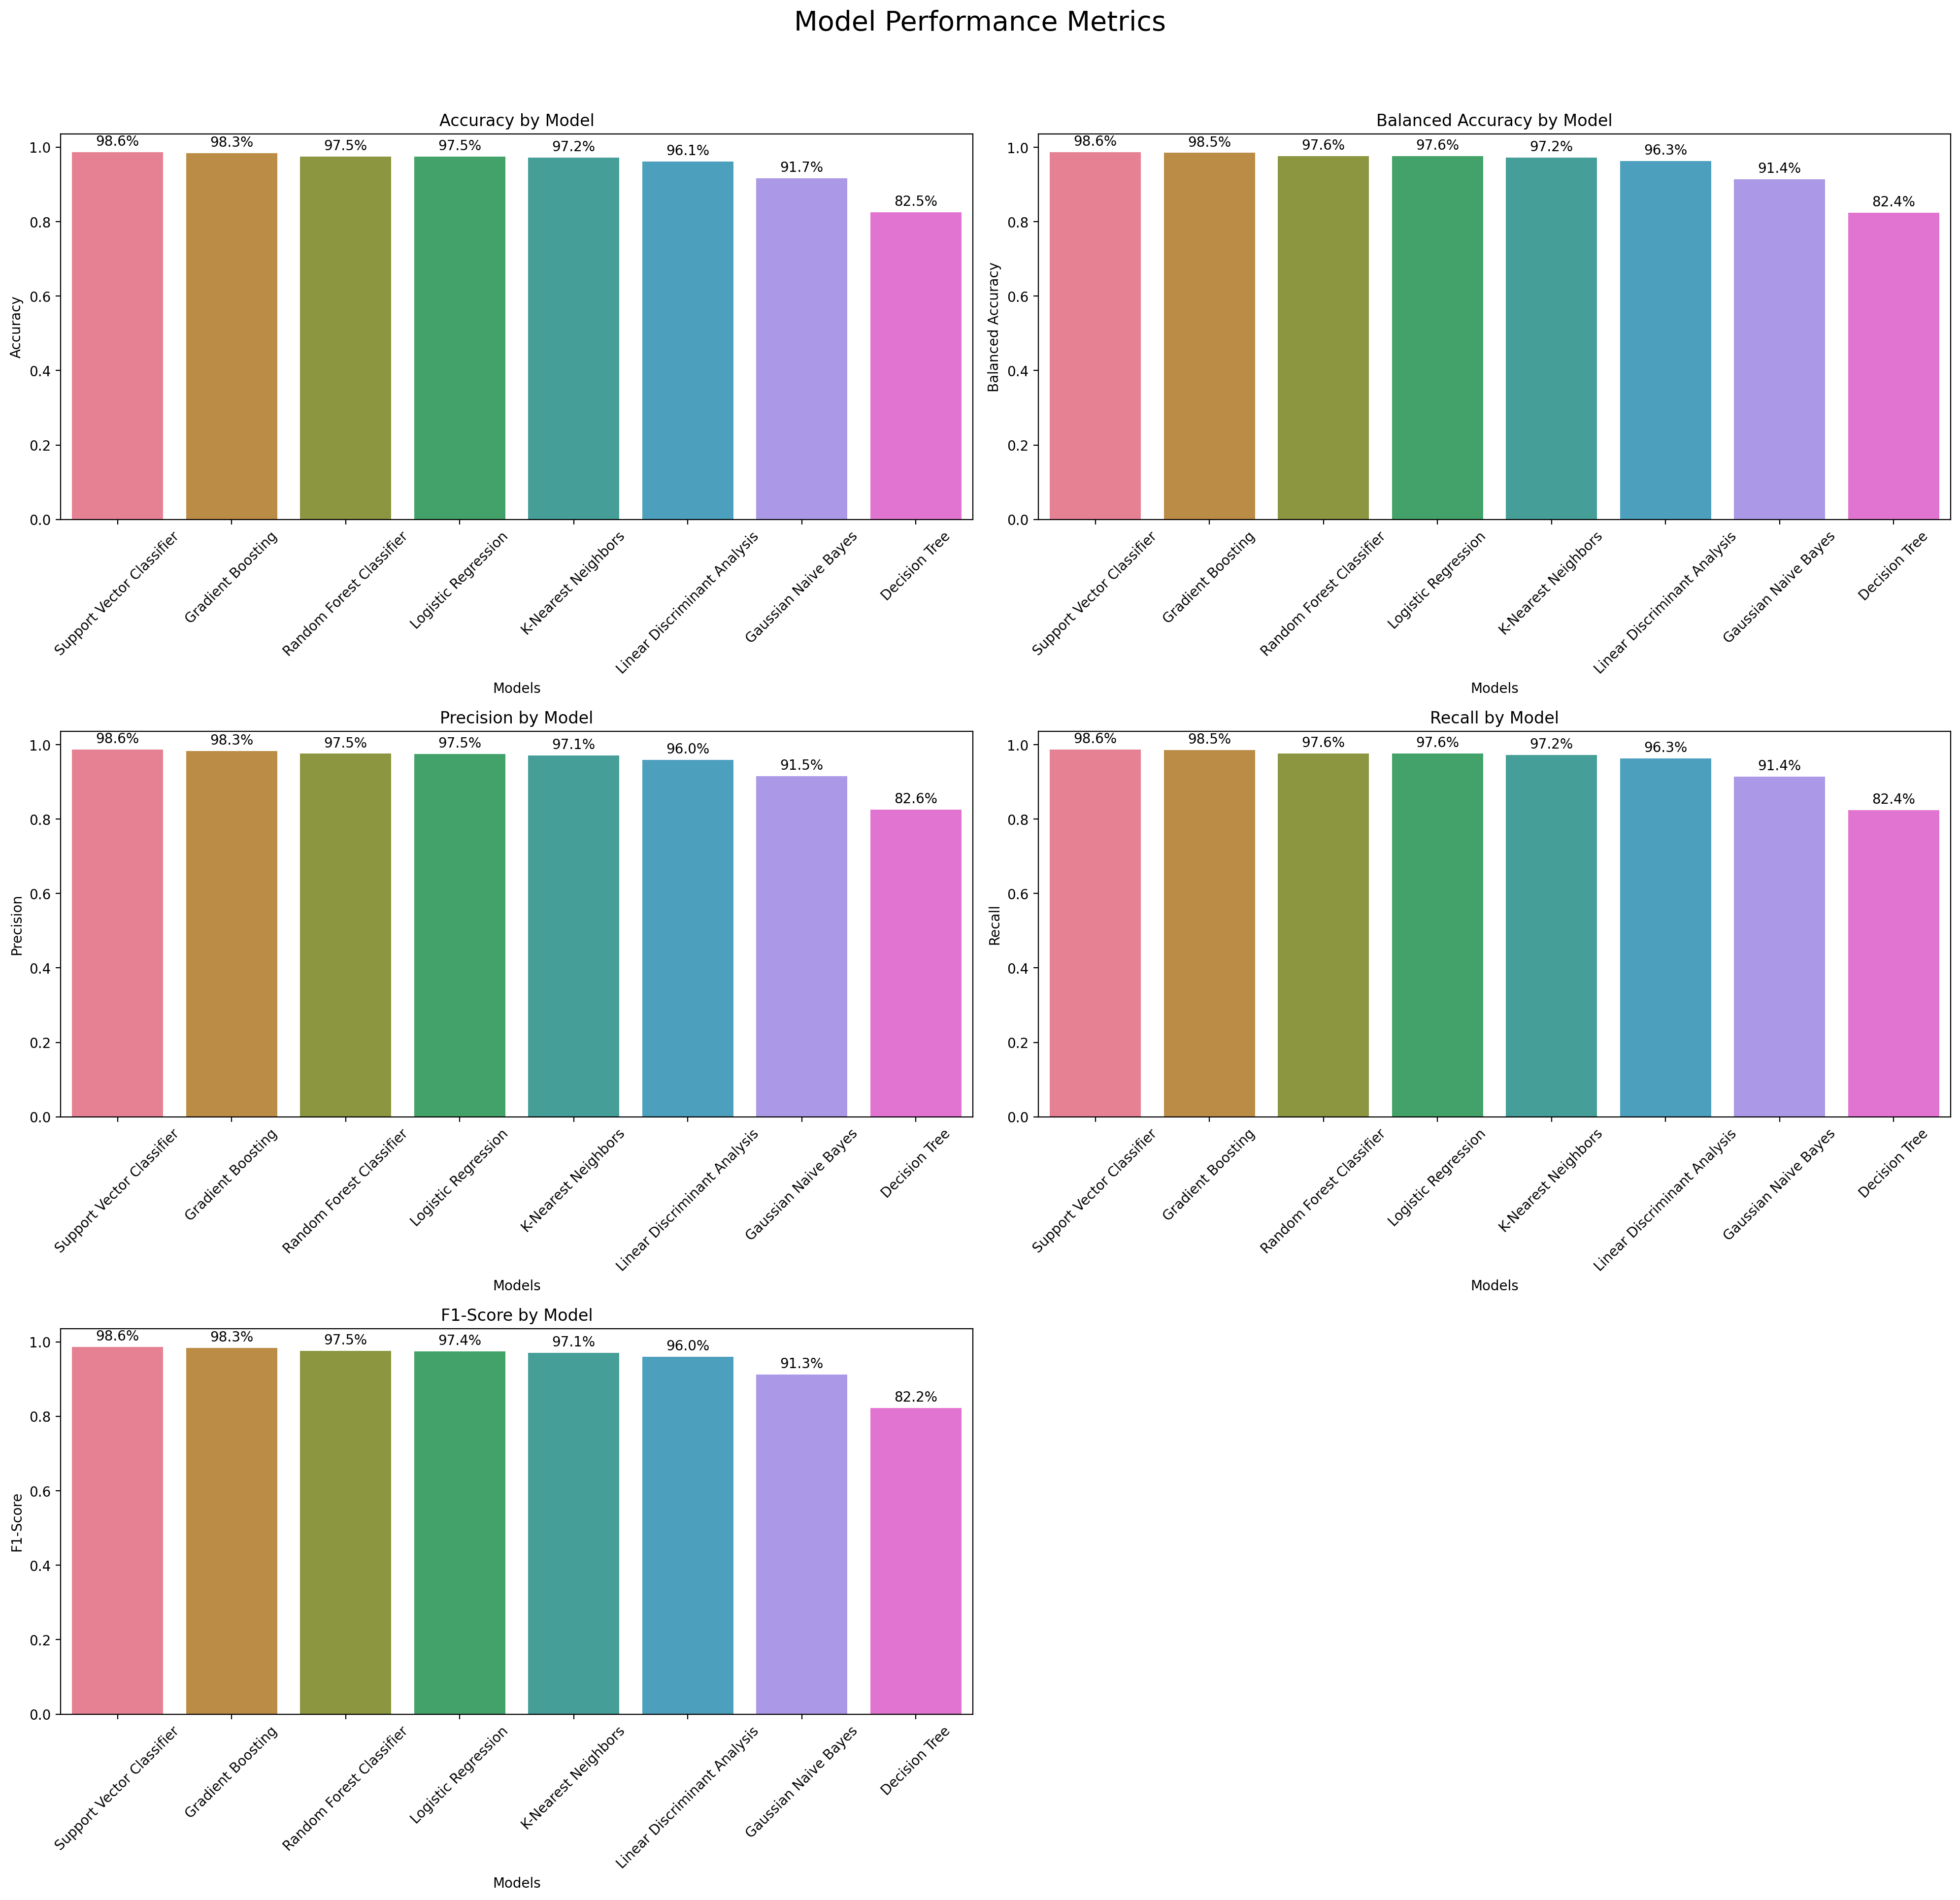

In [ ]:
# Extract model names from the results list (first element of each row)
model_names = [result[0] for result in results]
metric_names = headers[1:]  # ["Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-Score"]

# Define a color palette
palette = sns.color_palette("husl", len(model_names))

# Create a figure with 4 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24), dpi=200)
fig.suptitle('Model Performance Metrics', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each metric and create a bar chart for that metric across models
for idx, metric in enumerate(metric_names):
    metric_index = headers.index(metric)
    values = [result[metric_index] for result in results]

    # Sort the values and corresponding model names
    sorted_values, sorted_model_names = zip(*sorted(zip(values, model_names), reverse=True))

    # Create a bar chart
    sns.barplot(ax=axes[idx], x=sorted_model_names, y=sorted_values, palette=palette, hue = model_names, legend = False)
    axes[idx].set_xlabel('Models')
    axes[idx].set_ylabel(metric)
    axes[idx].set_title(f'{metric} by Model')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(False)

    # Annotate the points with percentages in 1 decimal place
    for i, value in enumerate(sorted_values):
        axes[idx].text(i, value + 0.01, f'{value*100:.1f}%', ha='center', va='bottom')

# Hide any unused subplots
for i in range(len(metric_names), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Observation**

- The bar graph presents the performance of each model across various metrics, arranged from the highest to the lowest performing models.[[11]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


In [ ]:
# Store ROC AUC results
roc_auc_results = []

# Function to compute and store ROC AUC scores
def compute_roc_auc(model_name, model, X_test, y_test):
    prob_predictions = model.predict_proba(X_test)  # Get probability predictions

    # Determine if the task is binary or multiclass
    multi_class_option = "ovo" if len(np.unique(y_test)) > 2 else "raise"

    # Compute ROC AUC score with the correct multi_class setting
    score = roc_auc_score(y_test, prob_predictions, multi_class=multi_class_option)
    roc_auc_results.append([model_name, score])

# List of models with their names
models = {
    "Logistic Regression": lr_model,
    "Gaussian Naive Bayes": nb_grid_search,
    "Random Forest": rf_grid_search,
    "K-Nearest Neighbors": knn,
    "Decision Tree": dt_grid_search,
    "Support Vector Classifier": svm_model,
    "Gradient Boosting": gbc_grid_search,
    "Linear Discriminant Analysis": lda_grid_search,
}

# Compute ROC AUC for each model
for name, model in models.items():
    compute_roc_auc(name, model, X_test_scaled, y_test)

# Sort results by ROC AUC score in descending order
roc_auc_results.sort(key=lambda x: x[1], reverse=True)

# Display results as a table with title
print("ROC AUC Scores for Various Models Arranged From The Highest Permance Model:")
print(tabulate(roc_auc_results, headers=["Model", "ROC AUC Score"], tablefmt="fancy_grid"))

# Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html


ROC AUC Scores for Various Models Arranged From The Highest Permance Model:
╒══════════════════════════════╤═════════════════╕
│ Model                        │   ROC AUC Score │
╞══════════════════════════════╪═════════════════╡
│ Support Vector Classifier    │        0.999976 │
├──────────────────────────────┼─────────────────┤
│ Random Forest                │        0.999669 │
├──────────────────────────────┼─────────────────┤
│ Gradient Boosting            │        0.999608 │
├──────────────────────────────┼─────────────────┤
│ Logistic Regression          │        0.999293 │
├──────────────────────────────┼─────────────────┤
│ Linear Discriminant Analysis │        0.998843 │
├──────────────────────────────┼─────────────────┤
│ K-Nearest Neighbors          │        0.99667  │
├──────────────────────────────┼─────────────────┤
│ Gaussian Naive Bayes         │        0.985931 │
├──────────────────────────────┼─────────────────┤
│ Decision Tree                │        0.911814 │
╘═════

**Results**

- Overall, most models demonstrated outstanding performance, with only the Decision Tree model showing a noticeable drop in effectiveness.

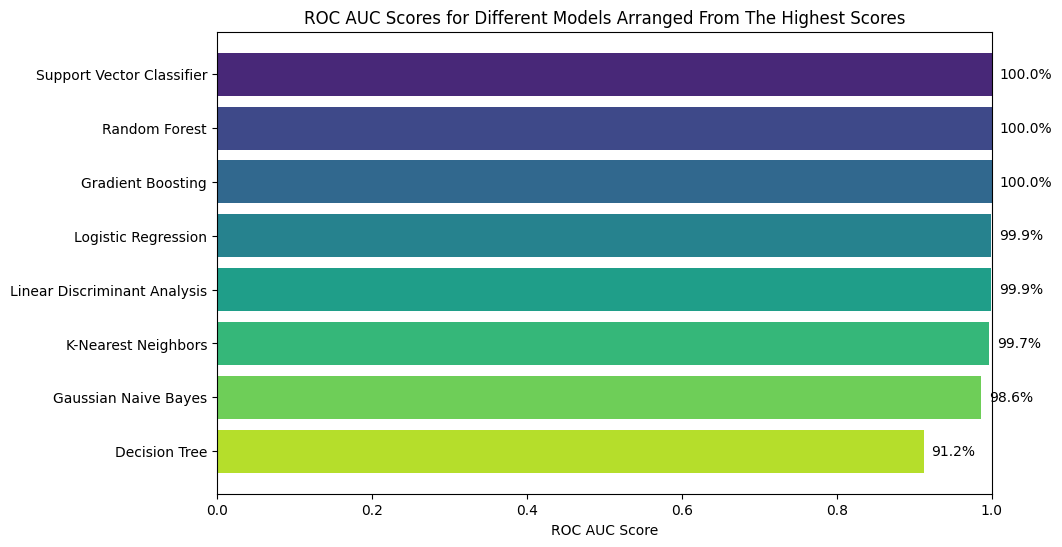

In [ ]:
# Convert ROC AUC results to a DataFrame for plotting
roc_auc_df = pd.DataFrame(roc_auc_results, columns=["Model", "ROC AUC Score"])

# Sort DataFrame by ROC AUC score in descending order
roc_auc_df = roc_auc_df.sort_values(by="ROC AUC Score", ascending=False)

# Define a color palette with a succession of colors
palette = sns.color_palette("viridis", len(roc_auc_df))

# Plot bar graph for ROC AUC scores
plt.figure(figsize=(10, 6))
bars = plt.barh(roc_auc_df['Model'], roc_auc_df['ROC AUC Score'], color=palette)
plt.xlabel('ROC AUC Score')
plt.title('ROC AUC Scores for Different Models Arranged From The Highest Scores')
plt.xlim(0.0, 1.0)
plt.gca().invert_yaxis()
plt.grid(False)

# Annotate the bars with the ROC AUC scores as percentages on top of the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width*100:.1f}%', ha='left', va='center')

plt.show()


**Observation**

- The Support Vector Classifier, Random Forest, and Gradient Boosting showed top performance with near-perfect ROC AUC scores, while the Decision Tree lagged behind at 90.9%.


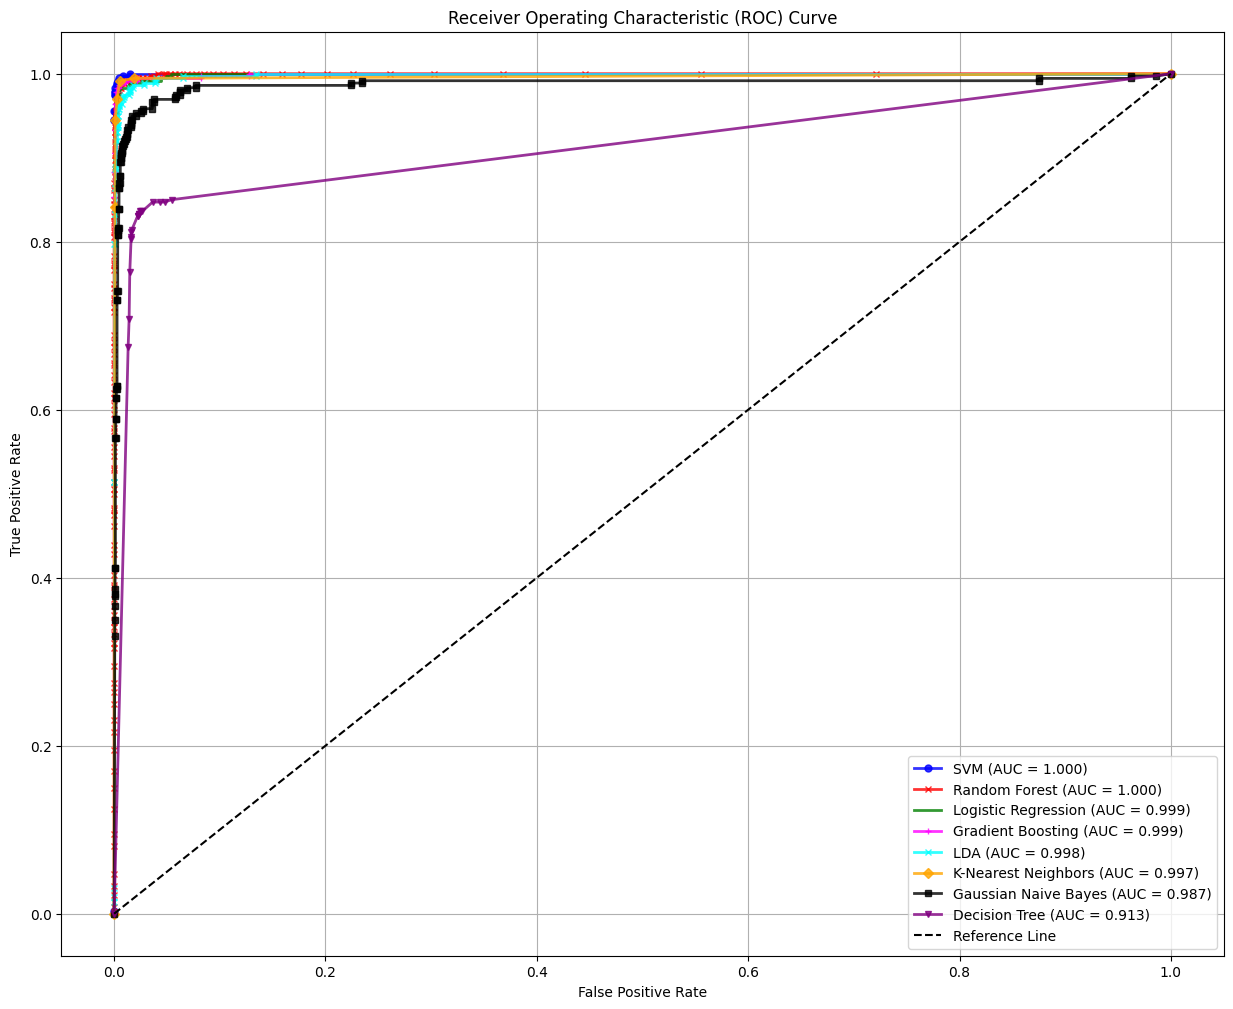

In [ ]:
# Binarize the target labels
y_test_binarized = label_binarize(y_test, classes=range(10))

# Get probability predictions for each classifier
lr_y_pred = lr_model.predict_proba(X_test_scaled)
nb_y_pred = nb_grid_search.predict_proba(X_test_scaled)
rf_y_pred = rf_grid_search.predict_proba(X_test_scaled)
knn_y_pred = knn.predict_proba(X_test_scaled)
dt_y_pred = dt_grid_search.predict_proba(X_test_scaled)
svm_y_pred = svm_model.predict_proba(X_test_scaled)
gbc_y_pred = gbc_grid_search.predict_proba(X_test_scaled)
lda_y_pred = lda_grid_search.predict_proba(X_test_scaled)

# Compute ROC curves and AUC for each classifier
lr_fpr, lr_tpr, _ = roc_curve(y_test_binarized.ravel(), lr_y_pred.ravel())
lr_auc = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test_binarized.ravel(), nb_y_pred.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test_binarized.ravel(), rf_y_pred.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test_binarized.ravel(), knn_y_pred.ravel())
knn_auc = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test_binarized.ravel(), dt_y_pred.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test_binarized.ravel(), svm_y_pred.ravel())
svm_auc = auc(svm_fpr, svm_tpr)

gbc_fpr, gbc_tpr, _ = roc_curve(y_test_binarized.ravel(), gbc_y_pred.ravel())
gbc_auc = auc(gbc_fpr, gbc_tpr)

lda_fpr, lda_tpr, _ = roc_curve(y_test_binarized.ravel(), lda_y_pred.ravel())
lda_auc = auc(lda_fpr, lda_tpr)

# Gather models and their AUC scores with line styles, colors, and markers
models_auc = [
    (svm_fpr, svm_tpr, '-', 'blue', 'o', 'SVM', svm_auc),
    (rf_fpr, rf_tpr, '-', 'red', 'x', 'Random Forest', rf_auc),
    (gbc_fpr, gbc_tpr, '-', 'magenta', '+', 'Gradient Boosting', gbc_auc),
    (lr_fpr, lr_tpr, '-', 'green', None, 'Logistic Regression', lr_auc),
    (lda_fpr, lda_tpr, '-', 'cyan', 'x', 'LDA', lda_auc),
    (knn_fpr, knn_tpr, '-', 'orange', 'D', 'K-Nearest Neighbors', knn_auc),
    (nb_fpr, nb_tpr, '-', 'black', 's', 'Gaussian Naive Bayes', nb_auc),
    (dt_fpr, dt_tpr, '-', 'purple', 'v', 'Decision Tree', dt_auc)
]

# Sort models by AUC scores in descending order
models_auc.sort(key=lambda x: x[6], reverse=True)

# Plot ROC curves with unique line styles, colors, and markers
plt.figure(figsize=(15, 12))
for fpr, tpr, linestyle, color, marker, label, auc_score in models_auc:
    plt.plot(fpr, tpr, linestyle=linestyle, color=color, linewidth=2, alpha=0.8, marker=marker, markersize=5, label=f'{label} (AUC = {auc_score:.3f})')

# Random classifier line (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Reference Line')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Observation**

- The ROC AUC curves show the performance of various models, arranged from highest to lowest.[[12]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
- This visual helps compare model effectiveness.

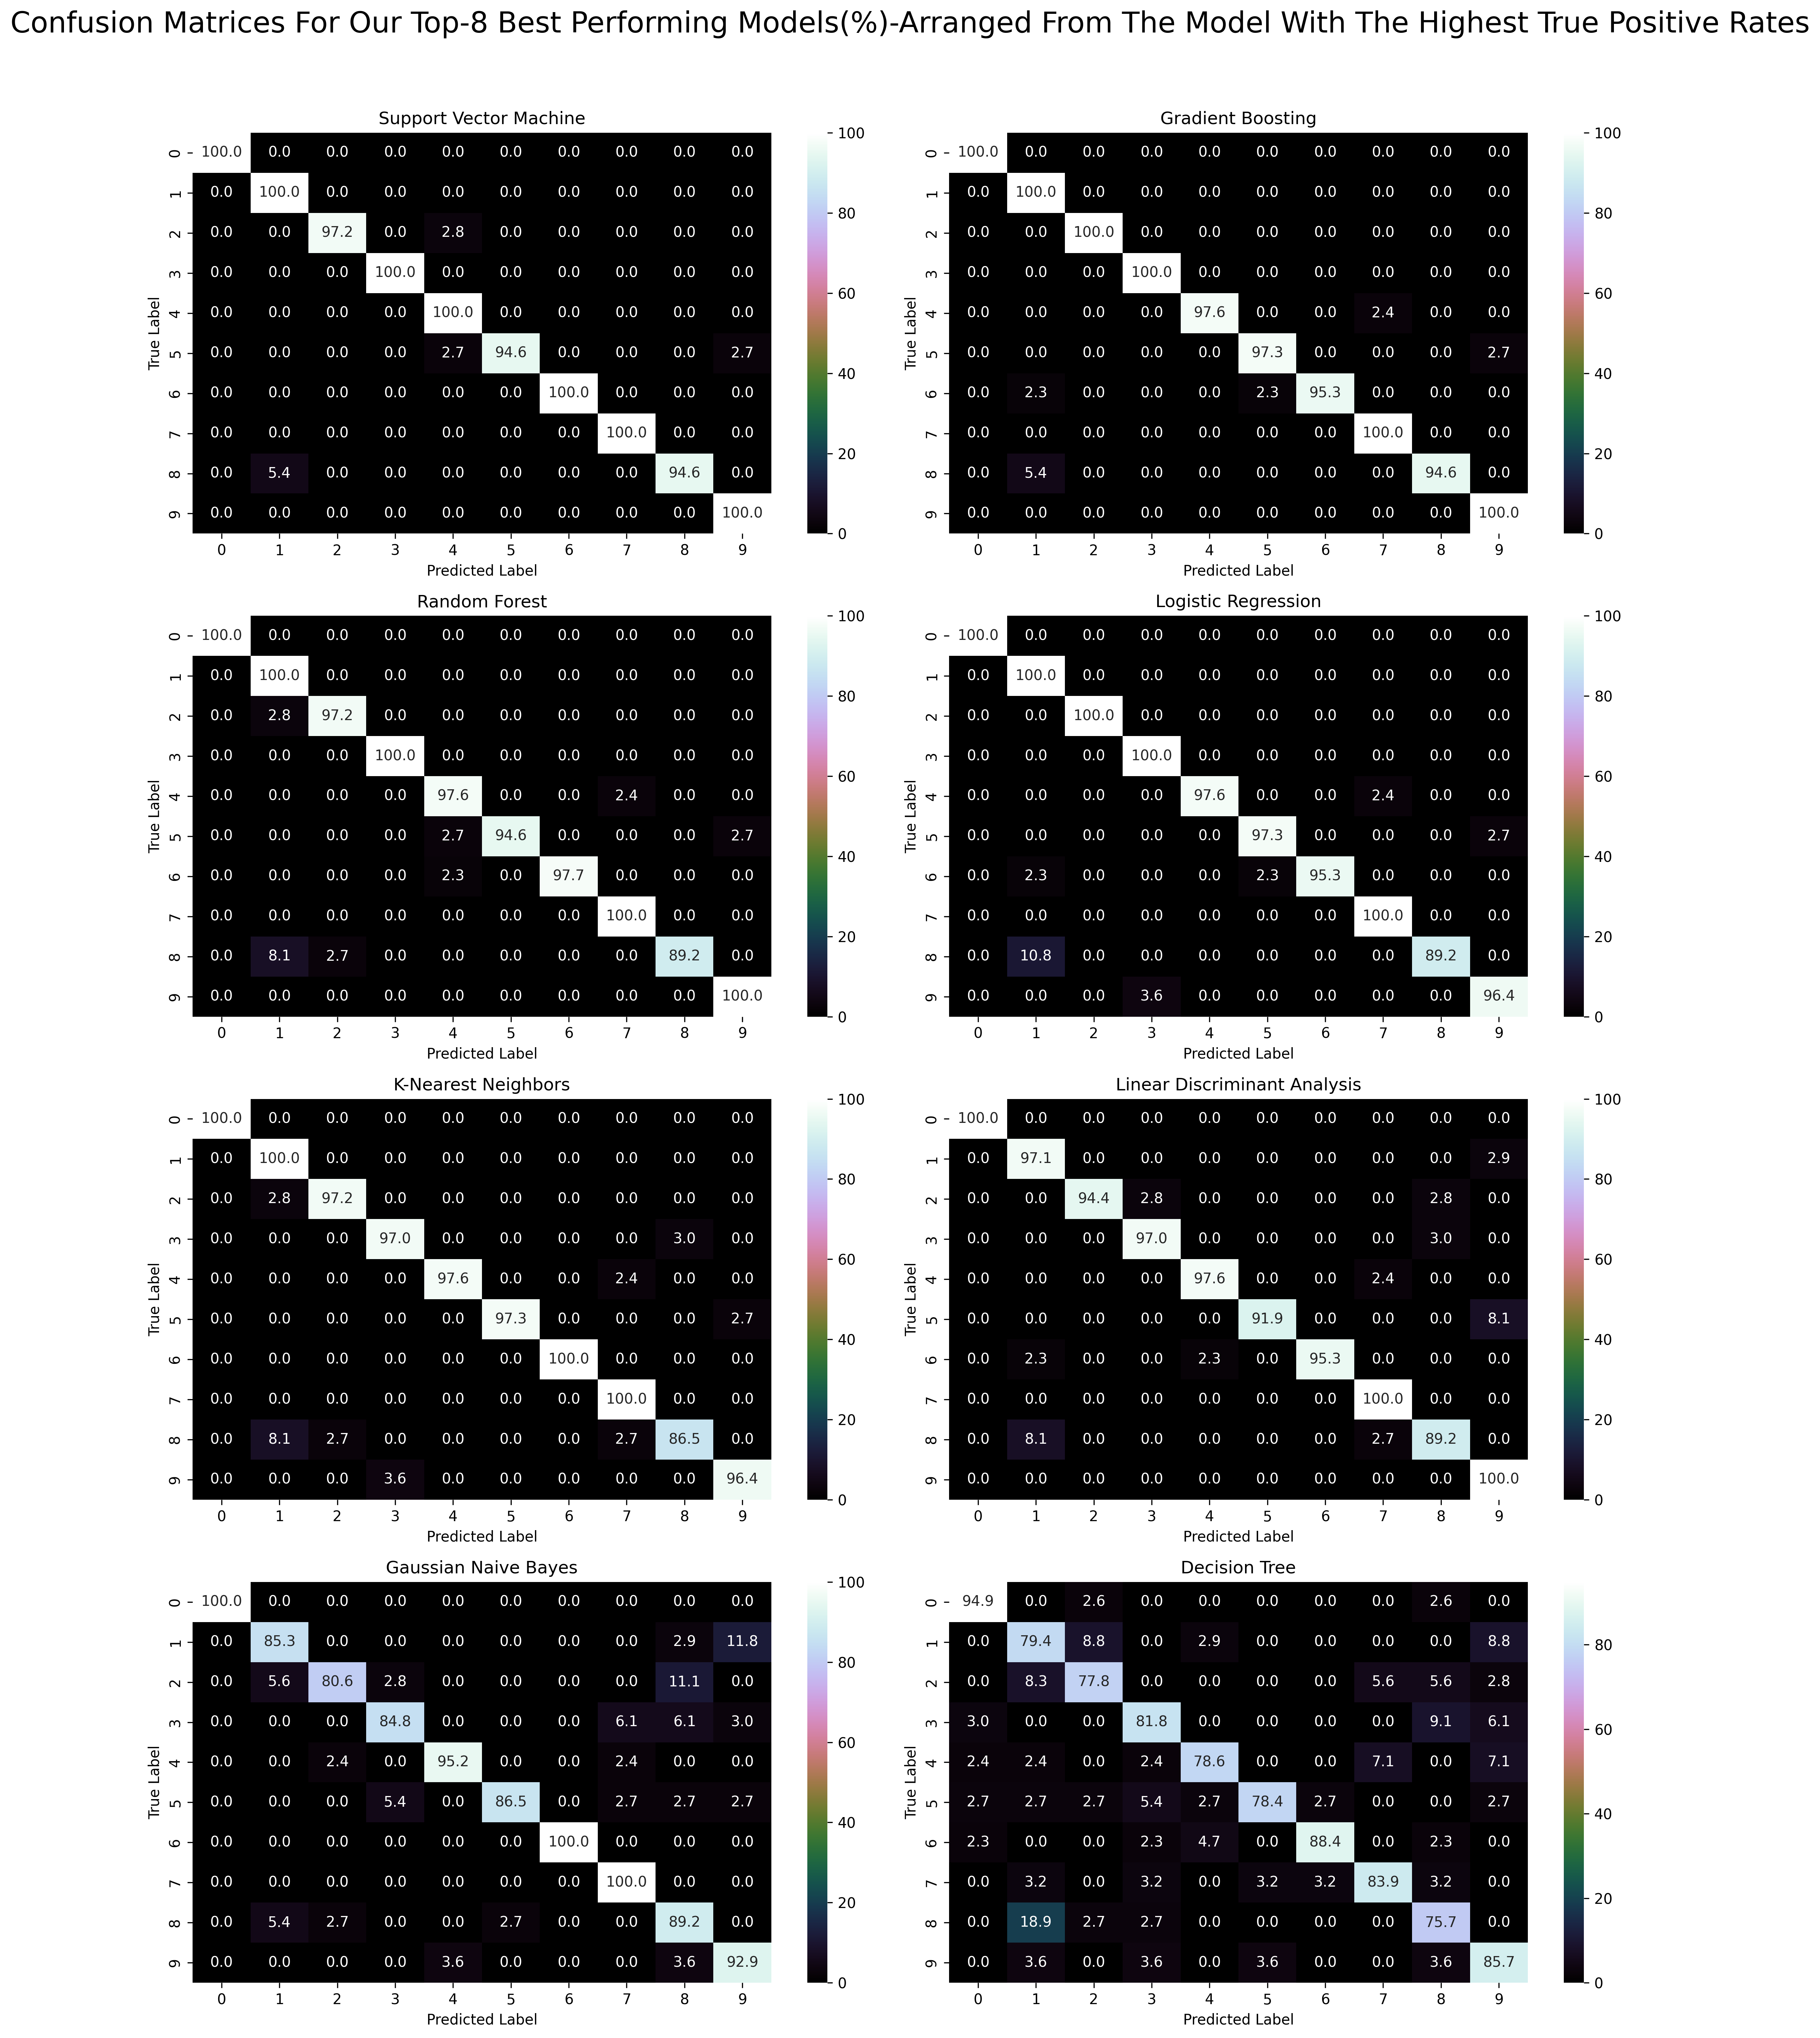

In [ ]:
import numpy as np


# Calculate true positive rates (TPR) from confusion matrices
def true_positive_rate(cm):
    return np.diag(cm) / cm.sum(axis=1)

# Get predictions for each model
lr_pred = lr_model.predict(X_test_scaled)
nb_pred = nb_grid_search.predict(X_test_scaled)
rf_pred = rf_grid_search.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
dt_pred = dt_grid_search.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
gbc_pred = gbc_grid_search.predict(X_test_scaled)
lda_pred = lda_grid_search.predict(X_test_scaled)

# Calculate confusion matrices for each model
lr_cm = confusion_matrix(y_test, lr_pred)
nb_cm = confusion_matrix(y_test, nb_pred) # Calculate confusion matrix for nb_grid_search
rf_cm = confusion_matrix(y_test, rf_pred) # Calculate confusion matrix for rf_grid_search
knn_cm = confusion_matrix(y_test, knn_pred) # Calculate confusion matrix for knn
dt_cm = confusion_matrix(y_test, dt_pred) # Calculate confusion matrix for dt_grid_search
svm_cm = confusion_matrix(y_test, svm_pred) # Calculate confusion matrix for svm_model
gbc_cm = confusion_matrix(y_test, gbc_pred) # Calculate confusion matrix for gbc_grid_search
lda_cm = confusion_matrix(y_test, lda_pred) # Calculate confusion matrix for lda_grid_search


# Define confusion matrices for each model
confusion_matrices = {
    "Logistic Regression": lr_cm,
    "Gaussian Naive Bayes": nb_cm,
    "Random Forest": rf_cm,
    "K-Nearest Neighbors": knn_cm,
    "Decision Tree": dt_cm,
    "Support Vector Machine": svm_cm,
    "Gradient Boosting": gbc_cm,
    "Linear Discriminant Analysis": lda_cm
}

# Calculate the average true positive rate for each model
model_tpr = {model: true_positive_rate(cm).mean() for model, cm in confusion_matrices.items()}

# Sort models by average true positive rate in descending order
sorted_models = sorted(model_tpr.items(), key=lambda x: x[1], reverse=True)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=300)
fig.suptitle("Confusion Matrices For Our Top-8 Best Performing Models(%)-Arranged From The Model With The Highest True Positive Rates", fontsize=20)

# Plot each confusion matrix (percentage) in sorted order
for ax, (model_name, _) in zip(axes.flatten(), sorted_models):
    cm_perc = confusion_matrices[model_name] / confusion_matrices[model_name].sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_perc, annot=True, fmt=".1f", cmap="cubehelix", ax=ax, cbar=True)
    ax.set_title(model_name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Observation**

- The confusion matrices are ordered by true positive rate, highlighting the best and worst-performing models. [[18]](https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning) [[20]](https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/)
- Support Vector Machine and Gradient Boosting show the highest rates, while Gaussian Naive Bayes and Decision Tree have more misclassifications, indicating lower performance (see appendix 1).




-----
# <center>CODING CONTRIBUTORS<center>
    
----

The implementation was a collaborative effort by:  
- Evans Konadu 
- Fanny Namondo Ngomba  
- Ashley Daud  
- Ohemaa Pokuaa Boadu 

----
# <center>REFERENCES<center>

-----

1. Machine Learning. "Best machine learning books". Available at: Best Machine Learning Books for Beginners & Experts [2023] - InterviewBit (Accessed: 10 February 2025)

2. GitHub. "Recognizing Handwritten Digits by Scikit-Learn." Available at: https://github.com/Abdullahw72/Recognizing-Hand-written-digits-by-scikit-learn/blob/master/Recognizing-Hand-written-digits-by-scikit-learn%20(Suven%20Internship%20P2).ipynb (Accessed: 29 February 2024)


3. Scikit-learn. GaussianNB. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (Accessed: 15 February 2025)


4. Scikit-learn. LogisticRegression. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 15 February 2025)


5. Scikit-learn. DecisionTreeClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (Accessed: 19 February 2025)


6. Scikit-learn. RandomForestClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Accessed: 17 February 2025)


7. Scikit-learn. KNeighborsClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (Accessed: 18 February 2025)


8.  Scikit-learn. SVC. Available at:  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


9. Scikit-learn, Gradient Boosting, Available at : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html (Accessed: 26 February 2025)


10. PyPI. "Tabulate." Available at: https://pypi.org/project/tabulate/ (Accessed: 26 February 2025)


11. Scikit-learn. "sklearn.metrics.classification_report." Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (Accessed: 27 February 2025)


12. Scikit-learn. "sklearn.metrics.roc_auc_score." Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html (Accessed: 24 February 2025)



13. Annotate."How to annotate"Available at:.  https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html (Accessed: 28 February 2025)


14. Bobbitt, Z., 2021. How to Plot Line of Best Fit in Python (With Examples). [online] Statology. Available at: https://www.statology.org/line-of-best-fit-python/ (Accessed 22 February 2025).



15. DataCamp."Introduction to plotting with Matplolib in python" Available at : https://www.datacamp.com/tutorial/matplotlib-tutorial-python (Accessed: 23 February 2025)


16. Pandas. "pandas.DataFrame." Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html (Accessed: 29 February 2025)


17. IBM. "What is linear discriminant analysis (LDA)?" Available at: https://www.ibm.com/think/topics/linear-discriminant-analysis (Accessed: 20 February 2025)


18. DataCamp. "What is A Confusion Matrix in Machine Learning?" Available at: https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning (Accessed: 25 February 2025)

19.  Scikit-learn. GridSearchCV. Available at: https://scikit-learn.org/stable/modules/grid_search.html (Accessed: 21 February 2025)


20. Proclus Academy. "Confusion Matrix and Accuracy with Scikit-Learn and Seaborn." Available at: https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/ (Accessed: 25 February 2025)




-----
# **<center>THANK YOU!<center>**

-----